<h1>Customizing Plot Legends</h1>

In [1]:
# The simplest legend can be created with plt.legend() command, which automatically creates a legend for any 
# labeled plot elements

%matplotlib inline
import numpy as np

In [2]:
import matplotlib.pyplot as plt
plt.style.use('classic')

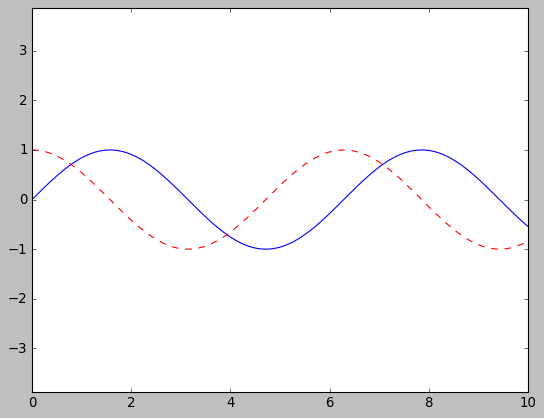

In [3]:
x = np.linspace(0,10,1000)
fig,ax = plt.subplots()
ax.plot(x,np.sin(x),'-b',label='Sine')
ax.plot(x,np.cos(x),'--r',label='Cosine')
ax.axis('equal')
leg = ax.legend;

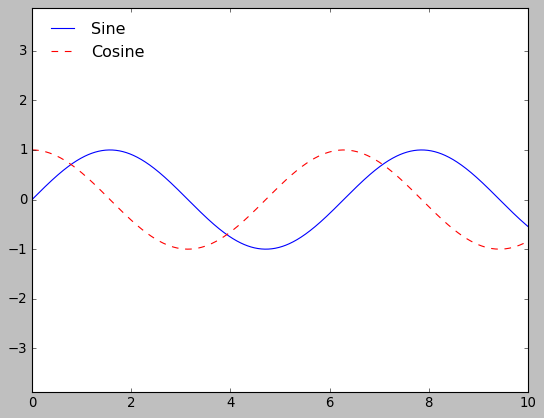

In [4]:
ax.legend(loc='upper left',frameon=False)
fig

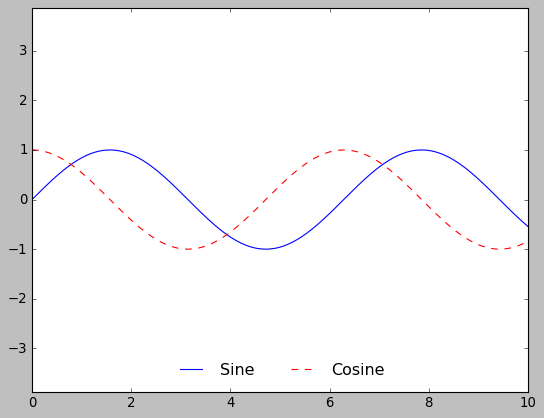

In [5]:
# We can use the ncol command to specify the number of columns in the legend

ax.legend(frameon=False, loc='lower center',ncol=2)
fig

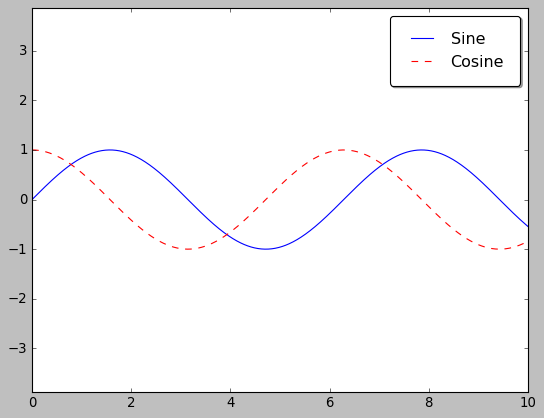

In [6]:
# We can use a rounded box or add a shadow, change the transparency of the frame, or change the padding around the
# text

ax.legend(fancybox=True, framealpha=1,shadow=True, borderpad=1)
fig

<h3>Choosing Elements for the legend</h3>

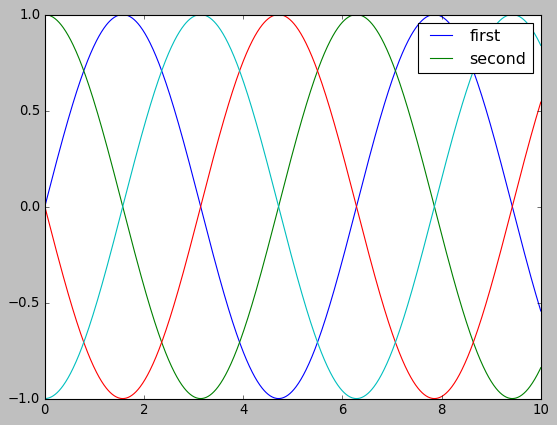

In [7]:
y = np.sin(x[:,np.newaxis] + np.pi*np.arange(0,2,0.5))
lines = plt.plot(x,y)
plt.legend(lines[:2],['first','second']);

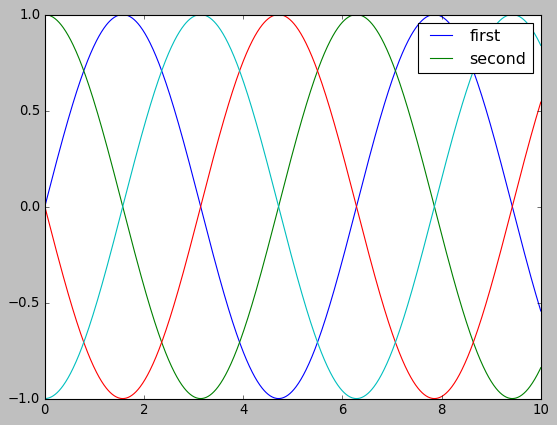

In [8]:
plt.plot(x,y[:,0],label='first')
plt.plot(x,y[:,1],label='second')
plt.plot(x,y[:,2:])
plt.legend(framealpha=1,frameon=True);

<h3>Legend for Size of Points</h3>

In [9]:
import pandas as pd

In [10]:
cities = pd.read_csv("california_cities.csv")

In [11]:
# Describe the data
cities.head()

,Unnamed: 0,city,latd,longd,elevation_m,elevation_ft,population_total,area_total_sq_mi,area_land_sq_mi,area_water_sq_mi,area_total_km2,area_land_km2,area_water_km2,area_water_percent
0,0,Adelanto,34.576111,-117.432778,875.0,2871.0,31765,56.027,56.009,0.018,145.107,145.062,0.046,0.03
1,1,AgouraHills,34.153333,-118.761667,281.0,922.0,20330,7.822,7.793,0.029,20.260,20.184,0.076,0.37
2,2,Alameda,37.756111,-122.274444,NaN,33.0,75467,22.960,10.611,12.349,59.465,27.482,31.983,53.79
3,3,Albany,37.886944,-122.297778,NaN,43.0,18969,5.465,1.788,3.677,14.155,4.632,9.524,67.28
4,4,Alhambra,34.081944,-118.135000,150.0,492.0,83089,7.632,7.631,0.001,19.766,19.763,0.003,0.01


In [12]:
# Describe the data
cities.describe()

,Unnamed: 0,latd,longd,elevation_m,elevation_ft,population_total,area_total_sq_mi,area_land_sq_mi,area_water_sq_mi,area_total_km2,area_land_km2,area_water_km2,area_water_percent
count,482.000000,482.000000,482.000000,434.000000,470.000000,4.820000e+02,480.000000,482.000000,481.000000,477.000000,478.000000,478.000000,477.000000
mean,240.500000,36.095088,-119.837714,180.416705,567.168723,6.489493e+04,18.442183,16.840981,1.589630,46.753283,43.547021,3.125178,5.301801
std,139.285678,2.298006,2.147676,309.531825,1001.265722,2.032041e+05,36.363230,32.694647,9.490386,90.972269,84.933022,11.562269,14.656428
min,0.000000,32.578333,-124.263333,-34.000000,-180.000000,1.000000e+00,0.314000,0.314000,0.000000,0.813000,0.813000,0.000000,0.000000
25%,120.250000,33.977292,-121.954931,22.000000,69.000000,1.090200e+04,3.708250,3.506500,0.000000,9.551000,9.025000,0.000250,0.000000
50%,240.500000,36.204722,-119.708611,67.000000,200.000000,2.905750e+04,9.093000,8.362000,0.029000,23.551000,21.533000,0.078500,0.340000
75%,360.750000,37.886667,-117.977292,173.500000,515.000000,6.646650e+04,19.878250,19.090000,0.244000,51.772000,49.322000,0.623250,1.870000
max,481.000000,41.965000,-114.596389,2402.000000,7880.000000,3.884307e+06,503.000000,469.000000,185.020000,1302.000000,1214.000000,122.270000,84.580000


In [13]:
lat,lon = cities['latd'],cities['longd']

In [14]:
population,area = cities['population_total'],cities['area_total_km2']

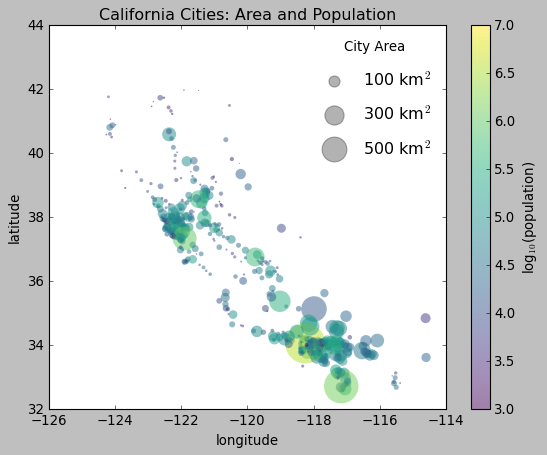

In [15]:
# Scatter the points, using size and color but no label
plt.scatter(lon,lat,label=None,c=np.log10(population),cmap='viridis',s=area, linewidths=0,alpha=0.5)
#plt.axis(aspect='equal')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.colorbar(label='log$_{10}$(population)')
plt.clim(3,7)

for area in [100, 300, 500]:
    plt.scatter([], [], c='k', alpha=0.3, s=area,label=str(area) + ' km$^2$')
plt.legend(scatterpoints=1, frameon=False,labelspacing=1, title='City Area')
plt.title('California Cities: Area and Population');

<h3>Multiple Legends</h3>

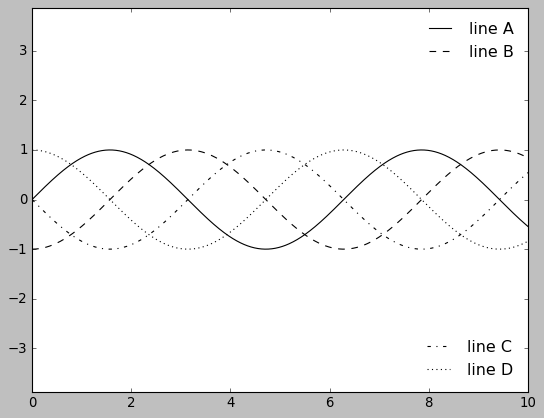

In [16]:
# Adding multiple legends to the same axes.

fig, ax = plt.subplots()

lines = []
styles = ['-','--','-.',':']

x = np.linspace(0,10,1000)

for i in range(4):
    lines += ax.plot(x, np.sin(x - i*np.pi/2), styles[i],color='black')
    
ax.axis('equal')

# specify the lines and labels of the first legend
ax.legend(lines[:2], ['line A', 'line B'],loc='upper right', frameon=False)

# Create the second legend and add the artist manually.
from matplotlib.legend import Legend

leg = Legend(ax, lines[2:], ['line C','line D'], loc='lower right', frameon=False)
ax.add_artist(leg);